### TFBS Classification - CNN

 https://arxiv.org/abs/1605.01133 (data+architecture)

In [8]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Reshape, Input, Convolution2D ,Activation, MaxPool1D
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.load('X_TFBS.npy')
y = np.load('Y_TFBS.npy')
Y = np_utils.to_categorical(y)

In [3]:
print X.shape, Y.shape

(17052, 101, 4) (17052, 2)


In [4]:
model = Sequential()

model.add(Convolution2D( 128,(5,1),  data_format='channels_last',  input_shape=(101,1,4) ))
model.add(Activation('relu'))
model.add(MaxPooling2D( (2,1) , strides=1, data_format='channels_last' ))
model.add(Convolution2D( 128,(5,1), data_format='channels_last' ))
model.add(Activation('relu'))
model.add(MaxPooling2D( (2,1) , strides=1, data_format='channels_last'))
model.add(Dropout(0.2))
model.add(Convolution2D( 128,(5,1),  data_format='channels_last' ))
model.add(Activation('relu'))
model.add(MaxPooling2D( (2,1) ,strides=1, data_format='channels_last' ))
model.add(Convolution2D( 128,(5,1), data_format='channels_last' ))
model.add(Activation('relu'))
model.add(MaxPooling2D( (82,1), strides=1, data_format='channels_last'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 97, 1, 128)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 1, 128)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 1, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 1, 128)        82048     
_________________________________________________________________
activation_2 (Activation)    (None, 92, 1, 128)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 91, 1, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 91, 1, 128)        0         
__________

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
X = X.reshape(X.shape[0], 101, 1, 4)
hist = model.fit(X, Y,epochs = 20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 13641 samples, validate on 3411 samples
Epoch 1/20
13641/13641 [==============================] - 37s - loss: 0.6948 - acc: 0.5015 - val_loss: 0.6928 - val_acc: 0.5013
Epoch 2/20
13641/13641 [==============================] - 25s - loss: 0.6916 - acc: 0.5198 - val_loss: 0.6888 - val_acc: 0.5207
Epoch 3/20
13641/13641 [==============================] - 22s - loss: 0.6810 - acc: 0.5648 - val_loss: 0.6617 - val_acc: 0.6113
Epoch 4/20
13641/13641 [==============================] - 22s - loss: 0.6414 - acc: 0.6305 - val_loss: 0.6150 - val_acc: 0.6541
Epoch 5/20
13641/13641 [==============================] - 22s - loss: 0.5735 - acc: 0.6967 - val_loss: 0.5659 - val_acc: 0.7007
Epoch 6/20
13641/13641 [==============================] - 22s - loss: 0.5395 - acc: 0.7322 - val_loss: 0.5553 - val_acc: 0.7142
Epoch 7/20
13641/13641 [==============================] - 22s - loss: 0.5115 - acc: 0.7526 - val_loss: 0.5376 - val_acc: 0.7232
Epoch 8/20
13641/13641 [==============================]

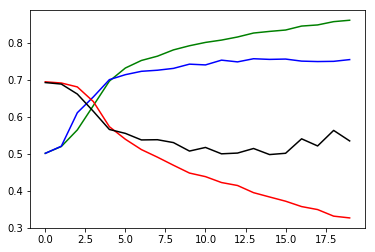

In [9]:
#first 10 epochs
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')